In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.color import rgb2gray

In [2]:
from tools.load import load
from tools.display import disp
from tools.processor import proc
import tools.fitness as ftn
import tools.dna as dna

Loading assets/star.png


<IPython.core.display.Javascript object>


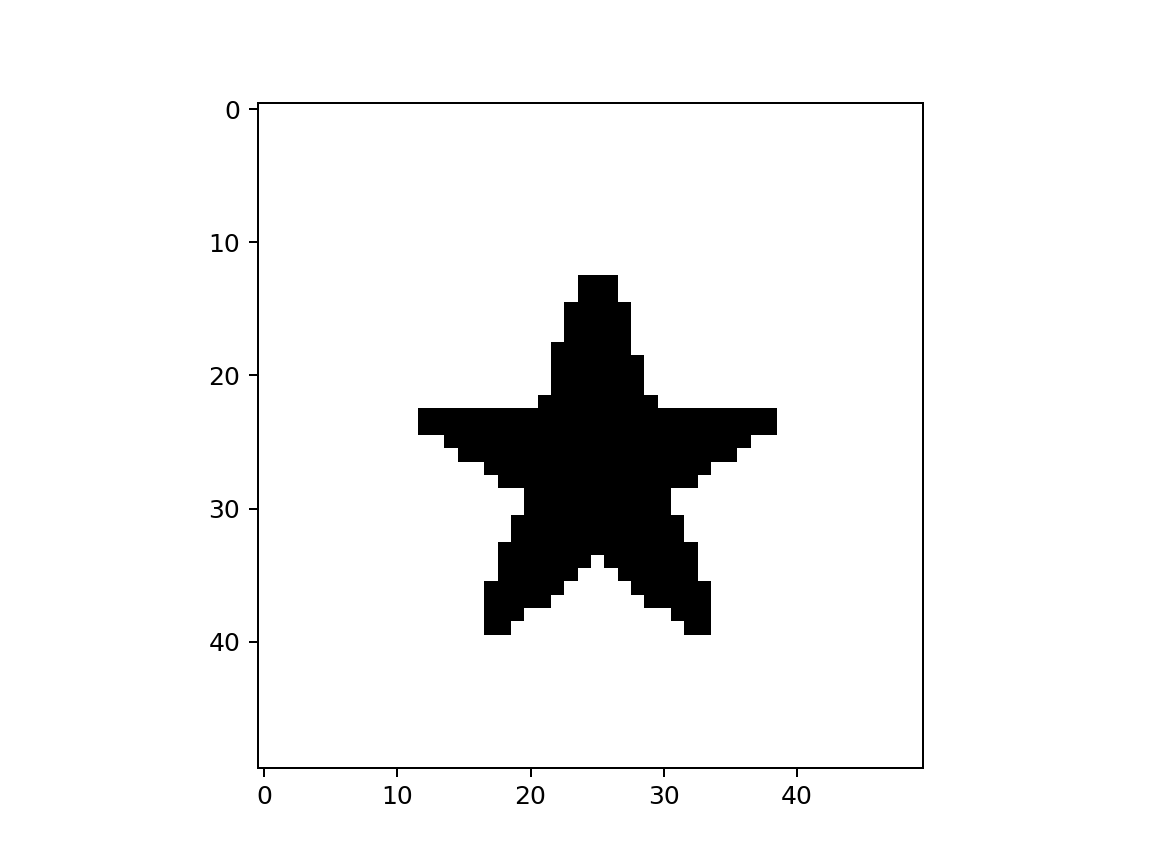

<IPython.core.display.Javascript object>


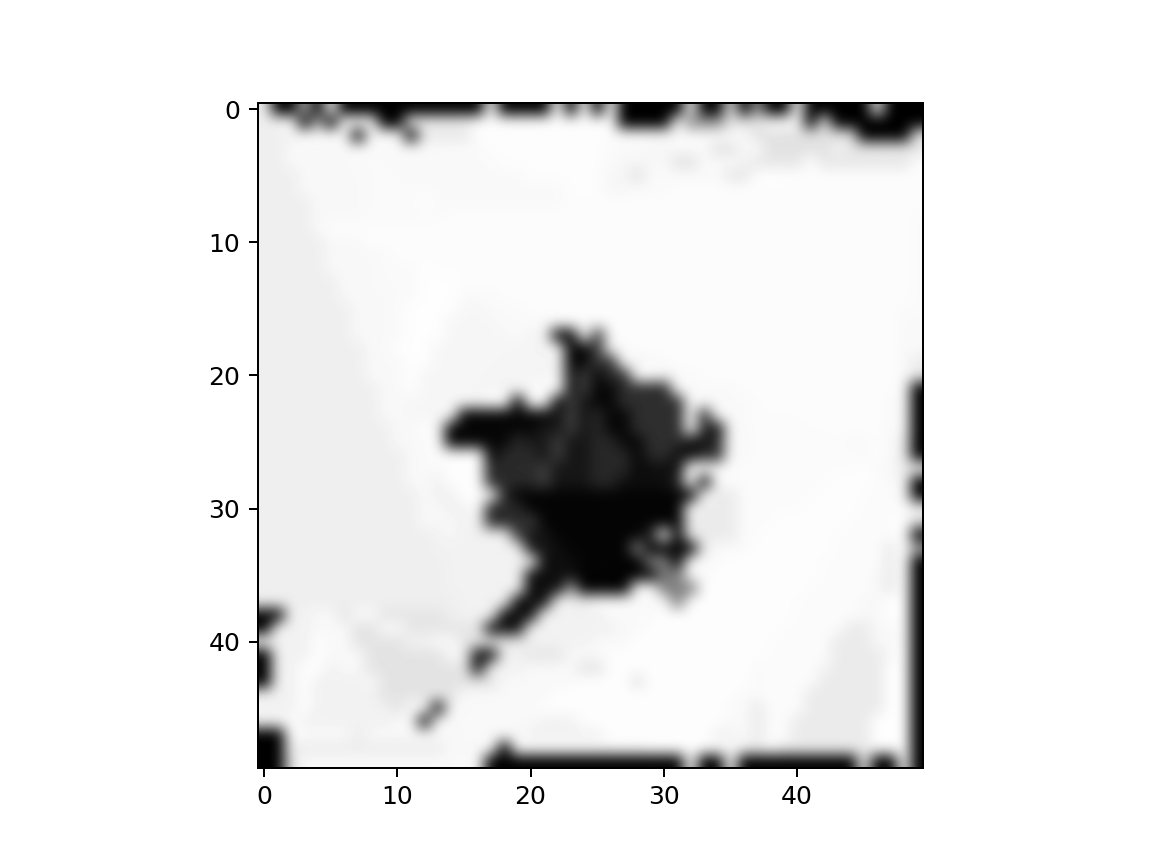

/Users/gerardomijares/python_lab/monalisa-reconstruction/tools/triangles.py:63: RuntimeWarning: divide by zero encountered in long_scalars
  invSlope1 = ( v3[1] - v2[1] ) / ( v3[0] - v2[0] ) # notice this is an inverse slope and thus x components go in the numerator
/Users/gerardomijares/python_lab/monalisa-reconstruction/tools/triangles.py:28: RuntimeWarning: divide by zero encountered in long_scalars
  invSlope2 = ( v2[1] - v1[1] ) / ( v2[0] - v1[0] ) # notice this is an inverse slope and thus x components go in the numerator
/Users/gerardomijares/python_lab/monalisa-reconstruction/tools/triangles.py:29: RuntimeWarning: divide by zero encountered in long_scalars
  invSlope1 = ( v3[1] - v1[1] ) / ( v3[0] - v1[0] ) # notice this is an inverse slope and thus x components go in the numerator
/Users/gerardomijares/python_lab/monalisa-reconstruction/tools/triangles.py:62: RuntimeWarning: divide by zero encountered in long_scalars
  invSlope2 = ( v3[1] - v1[1] ) / ( v3[0] - v1[0] ) # notice

In [3]:
%matplotlib nbagg

# Load and show image
data = load.image('star')
controlImg = rgb2gray(data)
disp.matrix(controlImg)

# Make some necessary measurements
(m,n) = controlImg.shape
popSize = 10

# Initialize variables
DNA = np.zeros((m,n))
bestFitness = ftn.fitness(controlImg,DNA)
myimages = []
fig = plt.figure()


# Start animation processing
for k in range(900):
    
    # Initialize a population
    randomPop = dna.generateRandomPop(popSize,m,n)
    
    # Breed a new population as a result of merging previous and current random population
    popDna = dna.mergePopulationOnDna(DNA,randomPop,m,n)
    
    # Order by fitness; fitnesses[0] has the highest fitness.
    (fitnesses, popDna) = ftn.orderByFitness(popDna,controlImg)
    
    # If better fitness found
    if bestFitness > fitnesses[0]:
        
        # Retrieve the best fitness
        bestFitness = fitnesses[0]
        DNA = popDna[:,:,0]
        
        # Recolect image for animation
        implot = disp.matrix(DNA, show=False)
        myimages.append([implot])

# Animate
my_anim = animation.ArtistAnimation(fig, myimages, interval=5, blit=True, repeat_delay=1000)
plt.show()


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


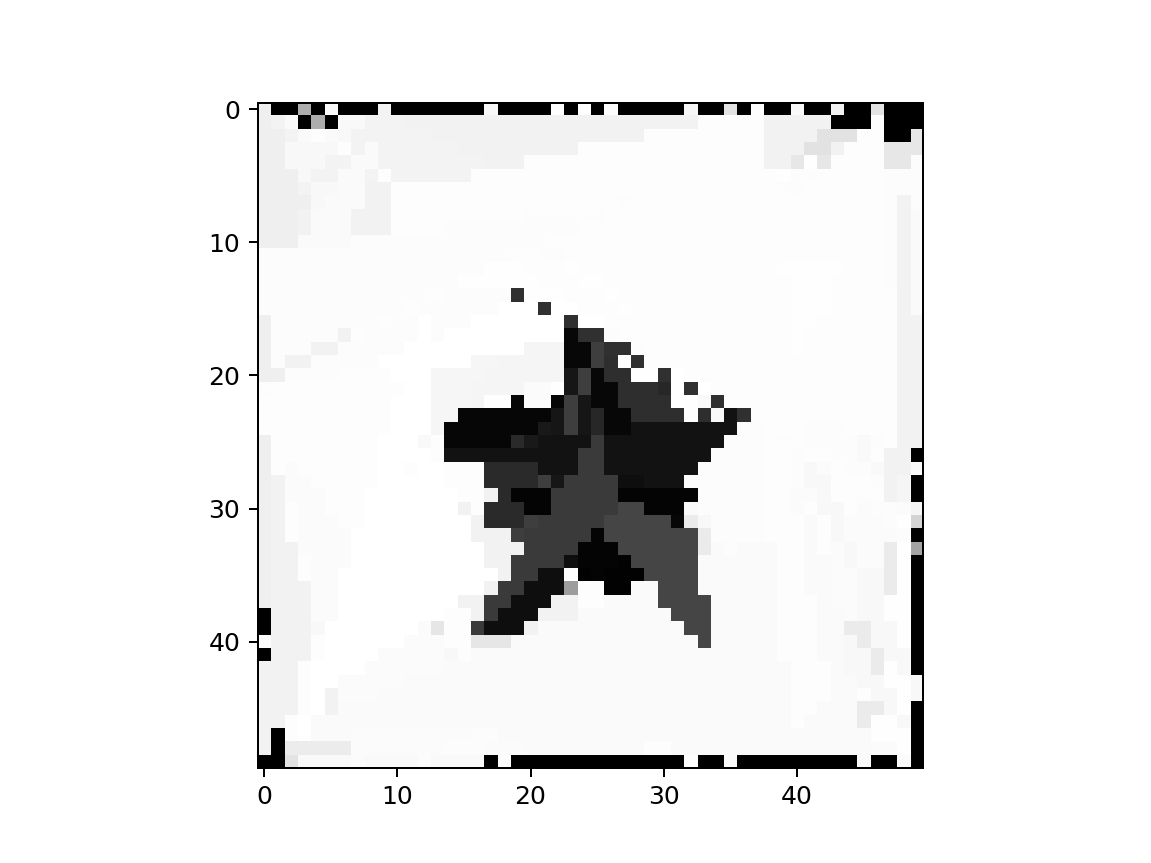

In [4]:
%matplotlib notebook
disp.matrix(DNA, show=False)